In [9]:
from platform import python_version
print("Python Version Used ",python_version())

Python Version Used  3.8.5


In [10]:
#Import Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from functions import findSimilerWords,kmeanss,clear
import plotly.express as px
import copy

In [11]:
dataset = clear("Dataset/Reviews.csv")
corpus = dataset['TextWithOutStopWords']
vectorizer = TfidfVectorizer(max_features=5000) # Considered only top 5000 words because it'll take too much time to compute  
X = vectorizer.fit_transform(corpus)
vocabulary = vectorizer.get_feature_names() # Get all the vocablury from the Corpus

In [12]:
#dataset.to_csv("Dataset/cleared_dataset.csv")
dataset.head(20)

,ProductId,UserId,ProfileName,Text,TextWithOutStopWords
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,I have bought several of the Vitality canned d...,bought sever vital dog food product found good...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",This is a confection that has been around a fe...,thi confect ha around centuri light pillowi ci...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",Great taffy at a great price. There was a wid...,great taffi great price wa wide assort yummi t...
5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,I got a wild hair for taffy and ordered this f...,got wild hair taffi order thi five pound bag t...
6,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,This saltwater taffy had great flavors and was...,thi saltwat taffi great flavor wa veri soft ch...
7,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,This taffy is so good. It is very soft and ch...,thi taffi good veri soft chewi flavor amaz wou...
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,Right now I'm mostly just sprouting this so my...,right mostli sprout thi cat eat grass love rot...
9,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,This is a very healthy dog food. Good for thei...,thi veri healthi dog food good digest also goo...


CumSum:  0.8854672395989618


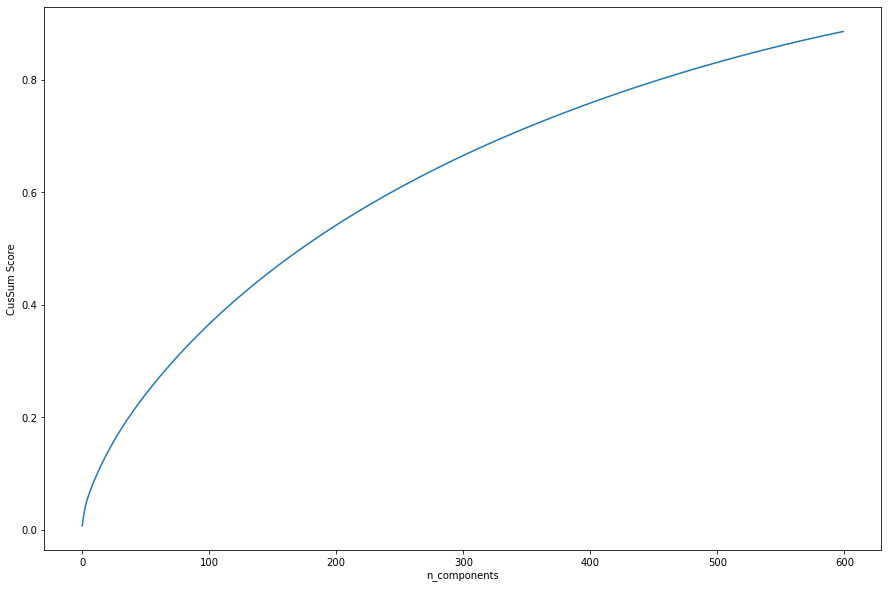

In [13]:
pipe = Pipeline([('count', TfidfVectorizer(vocabulary=vocabulary)),('tfid', TfidfTransformer())]).fit(corpus)
count = pipe['count'].transform(corpus).toarray()

tfid = pipe['tfid'].idf_

count = pd.DataFrame(count,columns=vocabulary)
count.columns = vocabulary

svd = TruncatedSVD(n_components=600,n_iter=7)
svd.fit(count)

cumSum = np.cumsum(svd.explained_variance_ratio_)
num = svd.explained_variance_ratio_

df = svd.fit(count).transform(count)
plt.figure(figsize=(15,10))
plt.xlabel('n_components')
plt.ylabel('CusSum Score')
plt.plot(cumSum)
print("CumSum: ",cumSum[-1])

In [14]:
cluster = [2,4,6,8,10,12,14]
clusterScoreLib = []
clusterScoreNonLib = []
for i in cluster:
    kmeans = KMeans(init='k-means++',n_clusters=i, random_state=0).fit(df)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    clusterScoreLib.append(kmeans.inertia_)
    values,score = kmeanss(df,i)
    clusterScoreNonLib.append(score)
    print(i,kmeans.inertia_)
    print(i,score)

2 838.0584915183889
2 838.0647965027738
4 820.4896843054901
4 829.9262249300193
6 810.6705165476552
6 818.691845326832
8 805.4847655960951
8 812.2925442306873
10 800.4119681652178
10 802.6462140799988
12 795.5269659406888
12 799.5032229943831
14 790.0626588821169
14 795.0556676148327


In [15]:
machine1 = ['K-means++' for x in range(len(cluster))]
machine2 = ['Random' for x in range(len(cluster))]
machines = copy.deepcopy(machine1) + copy.deepcopy(machine2)
units = copy.deepcopy(clusterScoreLib) + copy.deepcopy(clusterScoreNonLib)
time = copy.deepcopy(cluster)+copy.deepcopy(cluster)
fig = px.line(dict(machines=machines, units=units, time=time), x='time', y='units', color='machines')
fig.update_traces(mode='markers+lines')
fig.show()

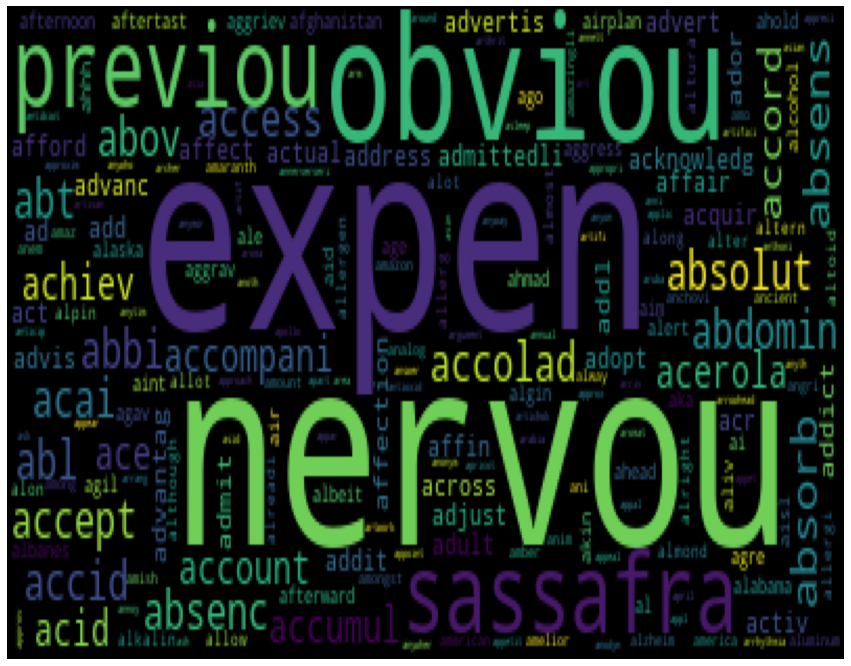

Word:  abbi 

Word calcium is same as  abbi 

Word china is same as  abbi 

Word appl is same as  abbi 

Word chilihead is same as  abbi 

Word chew is same as  abbi 

Word benefici is same as  abbi 

Word chef is same as  abbi 

Word area is same as  abbi 

Word chase is same as  abbi 

Word chanc is same as  abbi 

Word chalki is same as  abbi 

Word cent is same as  abbi 

Word ccc is same as  abbi 

Word caution is same as  abbi 

Word catti is same as  abbi 

Word cat is same as  abbi 

Word cash is same as  abbi 

Word carrier is same as  abbi 

Word aspart is same as  abbi 

Word aspect is same as  abbi 

Word assembl is same as  abbi 



In [16]:
word_cloud = WordCloud(relative_scaling = 1.0).generate(" ".join(vocabulary))
plt.figure(figsize=(15,12))
plt.imshow(word_cloud,aspect='auto')
plt.axis('off')
plt.show()

findSimilerWords(vocabulary[0],vocabulary,count)